In [1]:
sourceGrid = [list(x) for x in open('21.txt').read().split('\n')]


startRow = [x for x in range(len(sourceGrid)) if "S" in sourceGrid[x]][0]
startCol = [x for x in range(len(sourceGrid[0])) if sourceGrid[startRow][x] == 'S'][0]

sourceGrid[startRow][startCol] = '.'

print(startRow, startCol)

# grid

65 65


In [2]:
def print_grid(grid):
    for row in grid:
        print(''.join(row))
# print_grid(grid)

In [3]:
PART1_COUNT = 200
cleanGrid = sourceGrid.copy()
grid = sourceGrid.copy()
cleanGrid[startRow][startCol] = 'O'
minScores = {(startRow, startCol): 0}

for j in range(PART1_COUNT):
    newGrid = [x.copy() for x in cleanGrid]
    for r, row in enumerate(grid):
        if('O') in row:
            ohs = [i for i, x in enumerate(row) if x == 'O']
            for i in ohs:
                if i > 0 and row[i-1] == '.': 
                    if (r, i-1) not in minScores: minScores[(r, i-1)] = j+1
                    newGrid[r][i-1] = 'O'
                if i < len(row)-1 and row[i+1] == '.': 
                    if (r, i+1) not in minScores: minScores[(r, i+1)] = j+1
                    newGrid[r][i+1] = 'O'
                if(r > 0 and grid[r-1][i] == '.'): 
                    if (r-1, i) not in minScores: minScores[(r-1, i)] = j+1
                    newGrid[r-1][i] = 'O'
                if(r < len(grid)-1 and grid[r+1][i] == '.'): 
                    if (r+1, i) not in minScores: minScores[(r+1, i)] = j+1
                    newGrid[r+1][i] = 'O'
    grid = newGrid
    # print_grid(grid)
    # print(sum([1 for row in grid for x in row if x == 'O']))


# print_grid(grid)
sum([1 for row in grid for x in row if x == 'O'])

odds = int(len([s for s in minScores if minScores[s] % 2 == 0]))
evens = len(minScores) - odds

print("odds", odds, "evens", evens)


odds 7568 evens 7567


In [4]:
# print_grid(grid)

In [5]:
rockPositions = {}
for r, row in enumerate(sourceGrid):
    for c, x in enumerate(row):
        if x == '#':
            rockPositions[(c, r)] = 1
rowLen = len(grid[0])
colLen = len(grid)
def isRock(r, c):
    r1 = r % rowLen
    c1 = c % colLen
    # print("checking", r1, c1, (r1, c1) in rockPositions)
    return (r1, c1) in rockPositions

In [6]:
import numpy as np
from PIL import Image

def get_img(positions, origin=(-500, -500), height= 1200, width=1200, scale=2):
    #find min and max
    data = np.arange(width * height, dtype=np.int64).reshape((height, width))
    img_data = np.zeros((height, width, 3), dtype=np.uint8)
    for position in positions:
        if((position[0]-origin[0]) < 0 or (position[1]-origin[1]) < 0): 
            print("skipping", position, origin)
            continue
        img_data[position[0]-origin[0]][position[1]-origin[1]] = [255,255,255]
    # img_data[:, :, 0] = data // height
    # img_data[:, :, 1] = data % width
    # img_data[:, :, 2] = 100
    img = Image.fromarray(img_data)
    img = img.resize((width*scale, height*scale), Image.NEAREST)
    return img



185835


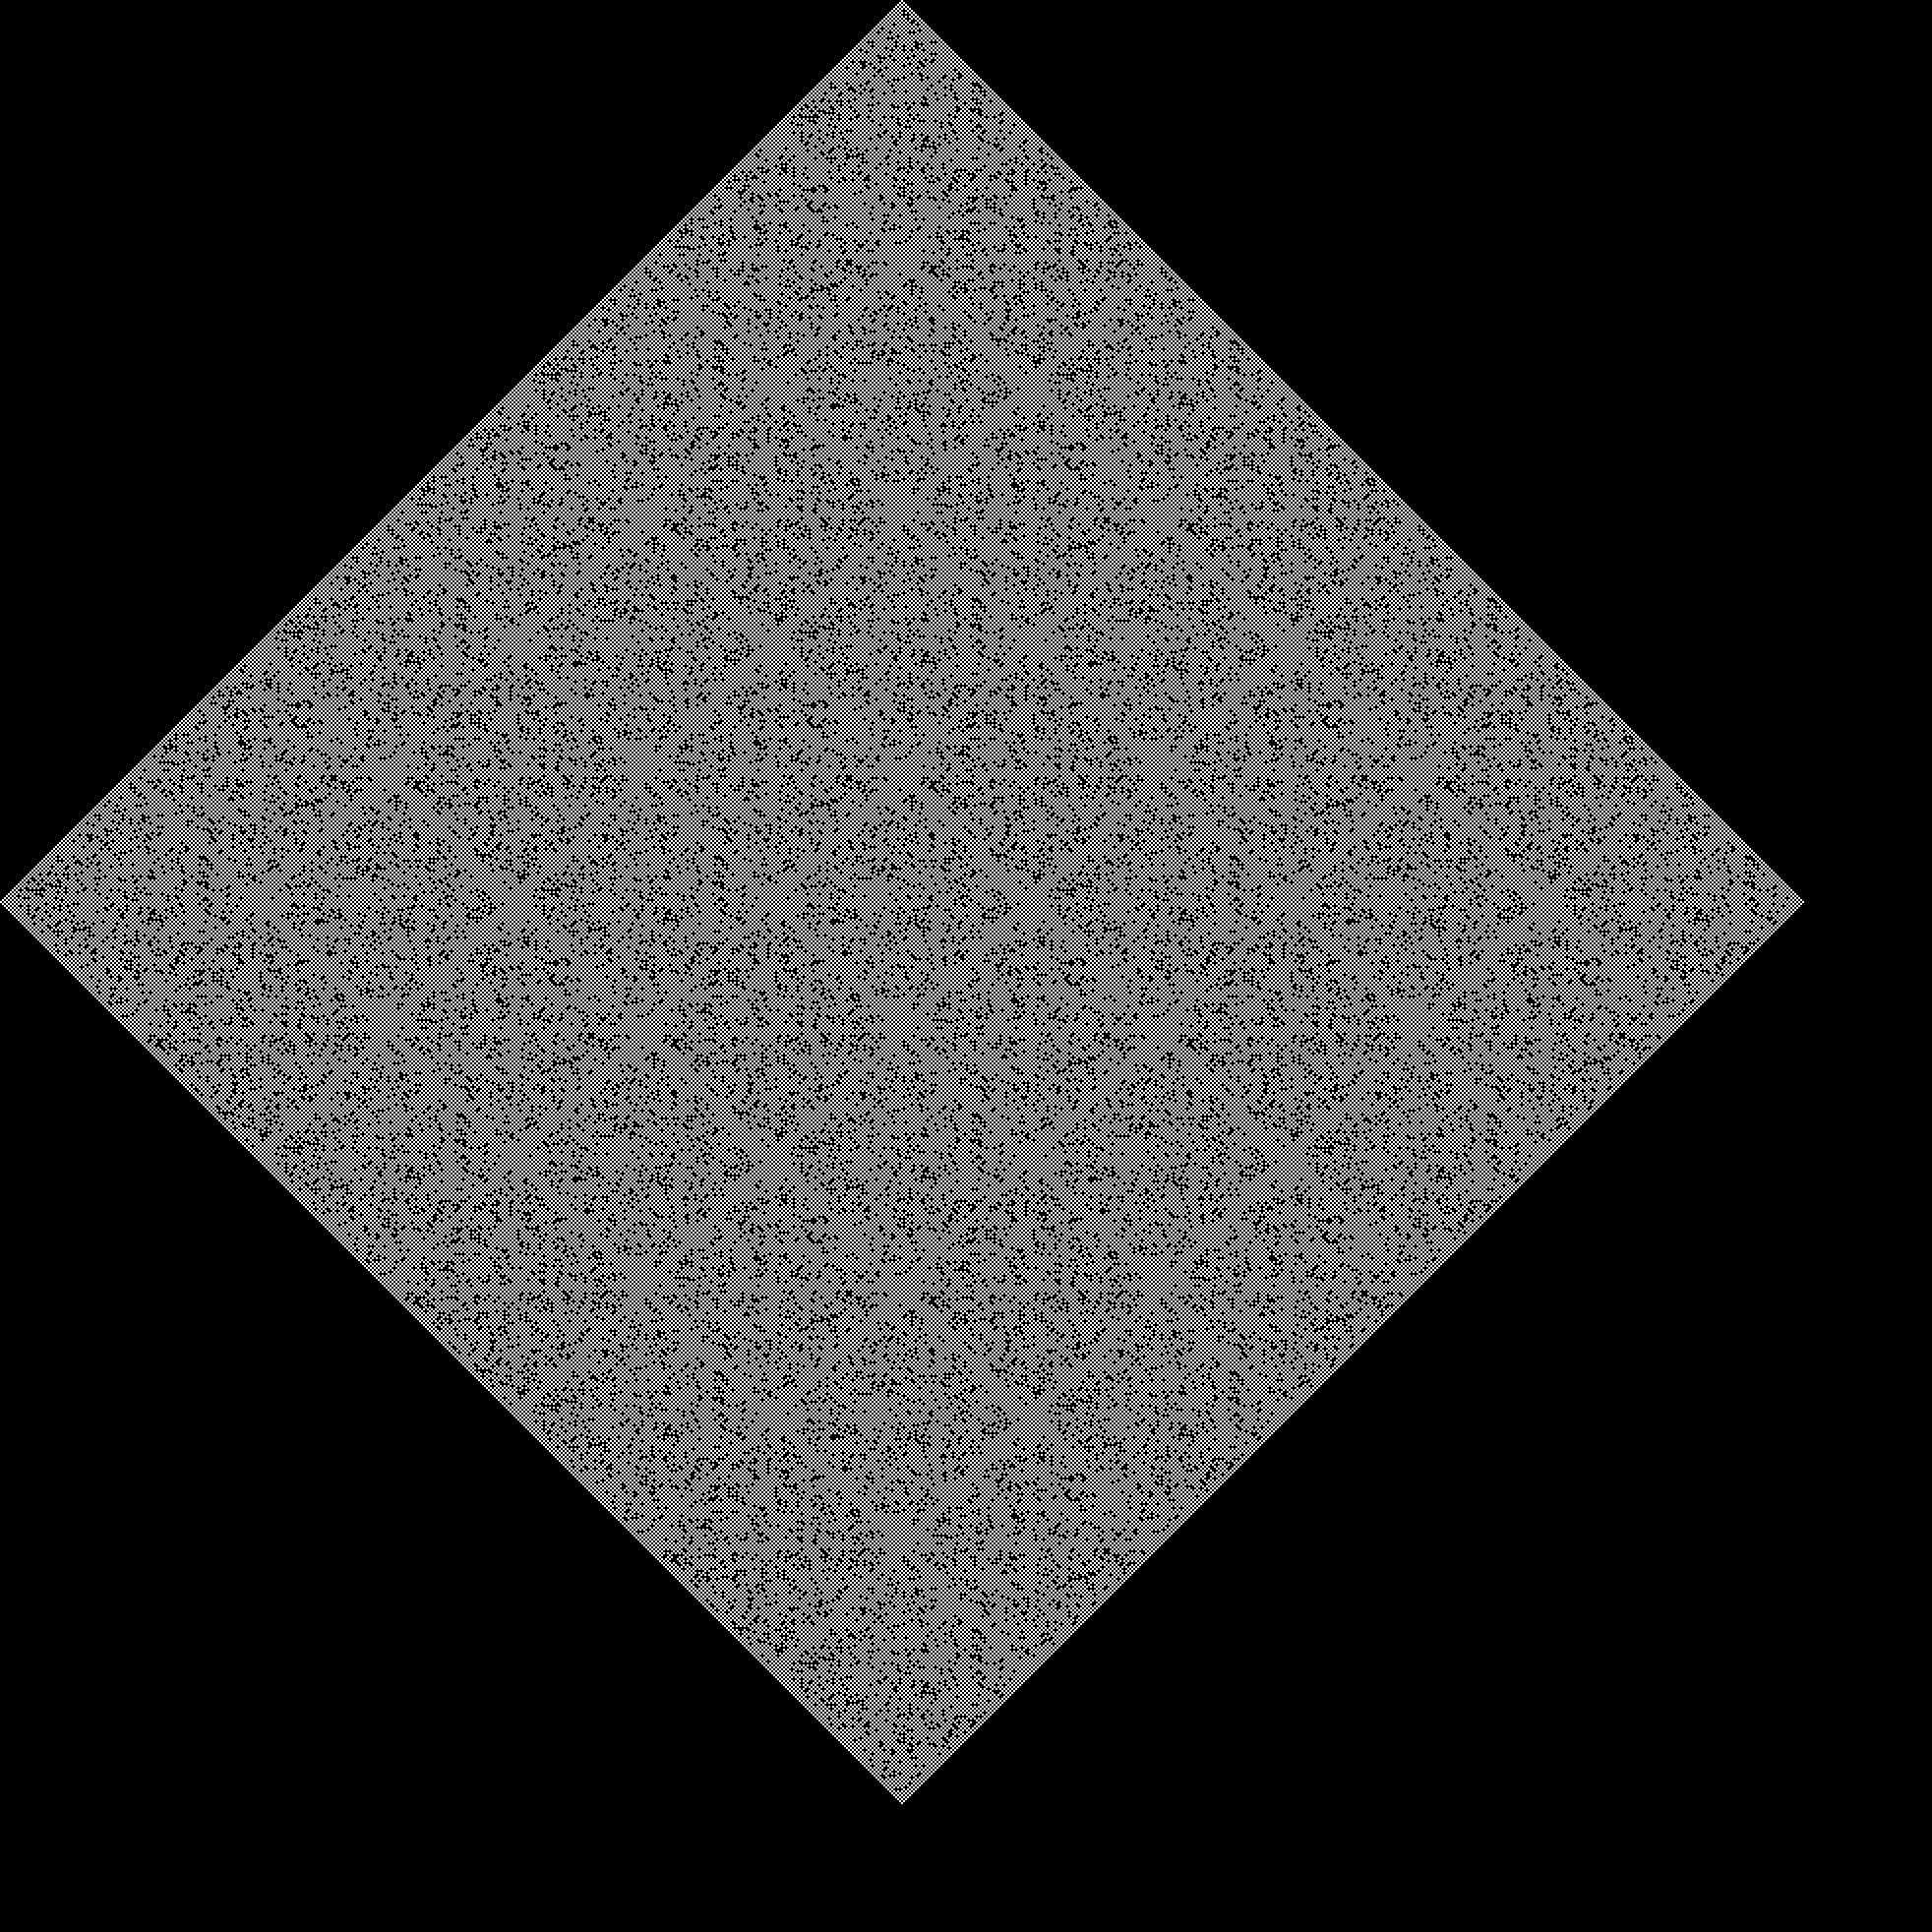

In [7]:
PART2_COUNT = 65 + (131 * 3)
cleanGrid = sourceGrid.copy()
grid = sourceGrid.copy()
cleanGrid[startRow][startCol] = 'O'
minScores = {(startRow, startCol): 0}
positions = [(startRow, startCol)]

for j in range(PART2_COUNT):
    newGrid = [x.copy() for x in cleanGrid]
    newPositions = []
    for position in positions:
        tests = [
            (position[0], position[1]-1),
            (position[0], position[1]+1),
            (position[0]-1, position[1]),
            (position[0]+1, position[1]),
        ]
        for testPos in tests:
            if isRock(*testPos) == False:
                if testPos not in minScores: minScores[testPos] = j+1
                newPositions.append(testPos)
    newPositions = list(set(newPositions))
    positions = newPositions
    # print("count of used Positions", len(newPositions))

# print_grid(grid)
# print("count of used Positions", len(minScores)))
# sum([1 for row in grid for x in row if x == 'O'])

# odds = int(len([s for s in minScores if minScores[s] % 2 == 0]))
# evens = len(minScores) - odds

# print("odds", odds, "evens", evens)
print(len(positions))
display(get_img(positions, origin=(int(-1 * PART2_COUNT * 1) + 65, int(-1 * PART2_COUNT * 1) + 65), height = int(PART2_COUNT * 2) + 65+1, width = int(PART2_COUNT * 2) + 65+1, scale=2))

In [8]:
grid = [x.copy() for x in sourceGrid]


In [9]:
PART2_COUNT = 10
def checkPosition(r,c):
    out = []
   
    if isRock(r-1, c) == False:  out.append((r-1, c))
    if isRock(r+1, c) == False:  out.append((r+1, c))
    if isRock(r, c-1) == False:  out.append((r, c-1))
    if isRock(r, c+1) == False:  out.append((r, c+1))
    return out
positions = {(startCol, startRow,0,0): 1}

for i in range(PART2_COUNT):
    print(i, len(positions), "------------------------")
    newPositions = {}
    for key in positions:
         p = checkPosition(key[0], key[1])
        #  print(p)
         for position in p:
            count = positions[key]
            print(position, count)
            r = position[0] % rowLen
            c = position[1] % colLen
            r2 = position[0] // rowLen
            c2 = position[1] // colLen
            pos = (r, c, r2, c2)
            if(pos) in newPositions:
                newPositions[pos] += count
            else:
                newPositions[pos] = count
            #  print(position)
            #  print(newPositions)
            #  newPositions[position] = 1
    newGrid = [x.copy() for x in cleanGrid]
    # for key in newPositions:
        # newGrid[key[1]][key[0]] = 'O'
    # print_grid(newGrid)
    positions = newPositions

print(len(positions))
print("sum of positions", sum([x for x in positions.values()]))
positions

0 1 ------------------------
(64, 65) 1
(66, 65) 1
(65, 64) 1
(65, 66) 1
1 4 ------------------------
(63, 65) 1
(65, 65) 1
(64, 64) 1
(64, 66) 1
(65, 65) 1
(67, 65) 1
(66, 64) 1
(66, 66) 1
(64, 64) 1
(66, 64) 1
(65, 63) 1
(65, 65) 1
(64, 66) 1
(66, 66) 1
(65, 65) 1
(65, 67) 1
2 9 ------------------------
(62, 65) 1
(64, 65) 1
(63, 66) 1
(64, 65) 4
(66, 65) 4
(65, 64) 4
(65, 66) 4
(65, 64) 2
(64, 63) 2
(64, 65) 2
(63, 66) 2
(65, 66) 2
(64, 65) 2
(66, 65) 1
(68, 65) 1
(67, 66) 1
(65, 64) 2
(66, 63) 2
(66, 65) 2
(65, 66) 2
(67, 66) 2
(66, 65) 2
(66, 67) 2
(64, 63) 1
(66, 63) 1
(65, 62) 1
(65, 64) 1
(66, 67) 1
(65, 66) 1
(65, 68) 1
3 13 ------------------------
(61, 65) 1
(63, 65) 1
(62, 64) 1
(62, 66) 1
(63, 65) 9
(65, 65) 9
(64, 64) 9
(64, 66) 9
(62, 66) 3
(64, 66) 3
(63, 65) 3
(63, 67) 3
(65, 65) 9
(67, 65) 9
(66, 64) 9
(66, 66) 9
(64, 64) 9
(66, 64) 9
(65, 63) 9
(65, 65) 9
(64, 66) 9
(66, 66) 9
(65, 65) 9
(65, 67) 9
(63, 63) 3
(65, 63) 3
(64, 64) 3
(67, 65) 1
(69, 65) 1
(68, 66) 1
(66

{(55, 65, 0, 0): 1,
 (57, 65, 0, 0): 69,
 (56, 64, 0, 0): 2,
 (56, 66, 0, 0): 10,
 (59, 65, 0, 0): 1266,
 (58, 66, 0, 0): 361,
 (57, 63, 0, 0): 5,
 (57, 67, 0, 0): 42,
 (61, 65, 0, 0): 7281,
 (60, 64, 0, 0): 1901,
 (60, 66, 0, 0): 3507,
 (59, 63, 0, 0): 160,
 (59, 67, 0, 0): 830,
 (58, 68, 0, 0): 76,
 (63, 65, 0, 0): 20401,
 (62, 64, 0, 0): 4528,
 (62, 66, 0, 0): 13536,
 (61, 63, 0, 0): 1091,
 (61, 67, 0, 0): 4454,
 (60, 68, 0, 0): 554,
 (58, 62, 0, 0): 13,
 (60, 62, 0, 0): 163,
 (59, 61, 0, 0): 26,
 (59, 69, 0, 0): 61,
 (65, 65, 0, 0): 46352,
 (64, 64, 0, 0): 27737,
 (64, 66, 0, 0): 28761,
 (63, 67, 0, 0): 9085,
 (62, 62, 0, 0): 997,
 (61, 61, 0, 0): 363,
 (61, 69, 0, 0): 20,
 (60, 70, 0, 0): 19,
 (67, 65, 0, 0): 23909,
 (66, 64, 0, 0): 30515,
 (66, 66, 0, 0): 40585,
 (65, 63, 0, 0): 27836,
 (65, 67, 0, 0): 24337,
 (63, 63, 0, 0): 6026,
 (64, 68, 0, 0): 5139,
 (60, 60, 0, 0): 42,
 (63, 61, 0, 0): 1734,
 (62, 60, 0, 0): 430,
 (69, 65, 0, 0): 6120,
 (68, 66, 0, 0): 17834,
 (67, 67, 0, 0

In [10]:
-4 % 3

2